In [1]:
import altair as alt
from vega_datasets import data

In [2]:
df = data.gapminder()

In [3]:
df.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


In [4]:
len(df)

693

In [5]:
df.describe()

,year,cluster,pop,life_expect,fertility
count,693.000000,693.000000,6.930000e+02,693.000000,693.000000
mean,1980.000000,2.476190,5.623431e+07,66.146406,3.605755
std,15.822809,1.446971,1.553014e+08,10.714033,1.921234
min,1955.000000,0.000000,5.386500e+04,23.599000,0.940000
25%,1965.000000,1.000000,4.563732e+06,59.957000,2.015000
50%,1980.000000,3.000000,1.229200e+07,69.498000,2.930000
75%,1995.000000,3.000000,4.443444e+07,73.840000,5.000500
max,2005.000000,5.000000,1.303182e+09,82.603000,8.500000


In [7]:
df['country'].unique()

array(['Afghanistan', 'Argentina', 'Aruba', 'Australia', 'Austria',
       'Bahamas', 'Bangladesh', 'Barbados', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cuba', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Haiti', 'Hong Kong', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kenya', 'South Korea', 'North Korea', 'Lebanon', 'Mexico',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Rwanda',
       'Saudi Arabia', 'South Africa', 'Spain', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Venezuela'], dtype=object)

In [8]:
df['cluster'].value_counts()

3    231
1    209
4     99
5     66
2     44
0     44
Name: cluster, dtype: int64

In [23]:
{c: str(l) for c, l in df.groupby('cluster')['country'].unique().items()}

{0: "['Afghanistan' 'Bangladesh' 'India' 'Pakistan']",
 1: "['Austria' 'Belgium' 'Croatia' 'Finland' 'France' 'Georgia' 'Germany'\n 'Greece' 'Iceland' 'Ireland' 'Italy' 'Netherlands' 'Norway' 'Poland'\n 'Portugal' 'Spain' 'Switzerland' 'Turkey' 'United Kingdom']",
 2: "['Kenya' 'Nigeria' 'Rwanda' 'South Africa']",
 3: "['Argentina' 'Aruba' 'Bahamas' 'Barbados' 'Bolivia' 'Brazil' 'Canada'\n 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Dominican Republic' 'Ecuador'\n 'El Salvador' 'Grenada' 'Haiti' 'Jamaica' 'Mexico' 'Peru' 'United States'\n 'Venezuela']",
 4: "['Australia' 'China' 'Hong Kong' 'Indonesia' 'Japan' 'South Korea'\n 'North Korea' 'New Zealand' 'Philippines']",
 5: "['Egypt' 'Iran' 'Iraq' 'Israel' 'Lebanon' 'Saudi Arabia']"}

In [25]:
df['region'] = df['cluster'].map({
    0: 'Indian Subcontinent',
    1: 'Europe',
    2: 'Africa',
    3: 'Americas',
    4: 'Asia/Pacific',
    5: 'Middle East',
})

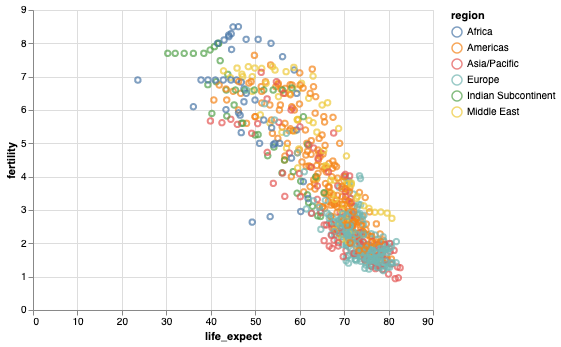

In [26]:
chart = alt.Chart(
    df
).mark_point(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N'
)

chart.display()

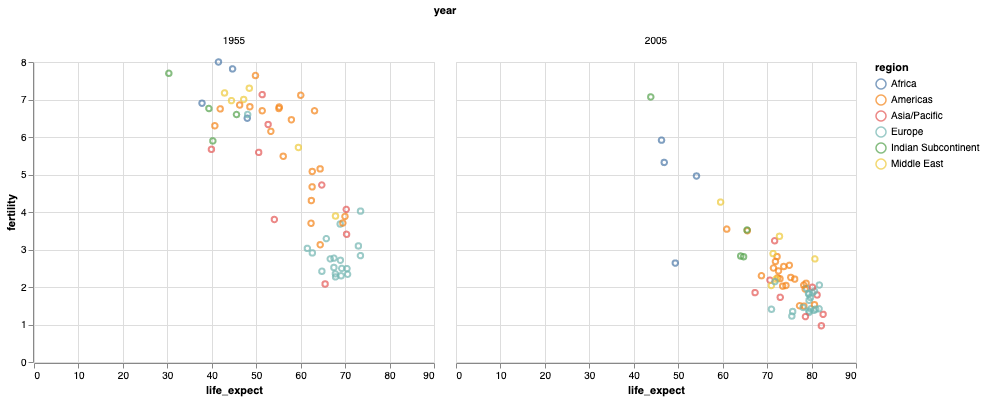

In [27]:
chart = alt.Chart(
    df[df['year'].isin([1955, 2005])]
).mark_point(
).encode(
    x='life_expect',
    y='fertility',
    color='region:N',
    column='year'
)

chart.display()